In [39]:
#intial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
from pandas_datareader import data

%matplotlib inline

In [40]:
pd.read_csv(r'uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv')

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [41]:
#assigning variables to csv files
algo = Path(r'uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv')
sp500 = Path(r'uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv')
whale = Path(r'uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv')

In [42]:
# Reading whale returns
pd.read_csv(whale)

# Count nulls
df_whale = pd.read_csv(whale)
df_whale.isnull()

# Drop nulls
df_whale.dropna(inplace=True)

# Checking Data Types
df_whale.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [43]:
# Reading algorithmic returns
pd.read_csv(algo)

# Count nulls
df_algo = pd.read_csv(algo)
df_algo.isnull()

# Drop nulls
df_algo.dropna(inplace=True)

# Checking Data types
df_algo.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [44]:
# Reading S&P 500 Closing Prices
pd.read_csv(sp500)
df_sp500 = pd.read_csv(sp500)

# Check Data Types
df_sp500.dtypes

# Drop nulls
df_sp500.isnull()
df_sp500.dropna(inplace=True)

# Slice "$" sign in Close column in order to convert data to float
df_sp500['Close'] = df_sp500['Close'].str.slice(start=1)

# Fix Data Types in column
convert_sp500 = {'Close': float}
df_sp500 = df_sp500.astype(convert_sp500)
df_sp500.dtypes

# Calculate Daily Returns 
df_sp500['Date']=pd.to_datetime(df_sp500.Date)
df_sp500.sort_values(by=['Date'])
df2_sp500=df_sp500
df2_sp500['Close']=df2_sp500['Close'].shift(-1) #aligning previous's day close to the current date before subtracting
df_sp500 = pd.read_csv(sp500)
df_sp500['Close'] = df_sp500['Close'].str.slice(start=1)
convert_sp500 = {'Close': float}
df_sp500 = df_sp500.astype(convert_sp500)
df_sp500.dtypes
df2_sp500['Close']=(df_sp500["Close"]-df2_sp500["Close"])/df2_sp500["Close"]
df2_sp500.dropna(inplace=True) #Dropped first day of investment because no change in investment
df2_sp500 #created S&P 500 daily returns in the dataframe df2_sp500

# Rename `Close` Column to be specific to this portfolio.
df2_sp500.columns=['Date','S&P 500 Daily Returns']
df2_sp500

,Date,S&P 500 Daily Returns
0,2019-04-23,0.008841
1,2019-04-22,0.001012
2,2019-04-18,0.001579
3,2019-04-17,-0.002274
4,2019-04-16,0.000509
...,...,...
1643,2012-10-08,-0.003457
1644,2012-10-05,-0.000322
1645,2012-10-04,0.007174
1646,2012-10-03,0.003624


In [45]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_algo['Date']=pd.to_datetime(df_algo.Date)  #Convert date columns in all dataframes to datetime type before merging
df_whale['Date']=pd.to_datetime(df_whale.Date)
Combined_Dataframe = pd.merge(pd.merge(df2_sp500,df_algo,on='Date'),df_whale,on='Date')
Combined_Dataframe

,Date,S&P 500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2019-04-23,0.008841,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
1,2019-04-22,0.001012,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2,2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
3,2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
4,2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
...,...,...,...,...,...,...,...,...
1038,2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
1039,2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
1040,2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
1041,2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213


<AxesSubplot:xlabel='Date'>

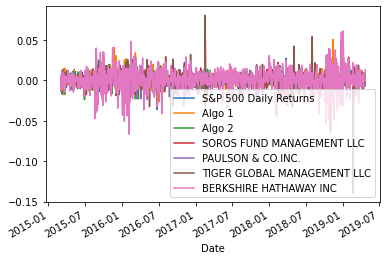

In [46]:
# Plot daily returns of all portfolios
Combined_Dataframe.plot(x='Date')


<AxesSubplot:xlabel='Date'>

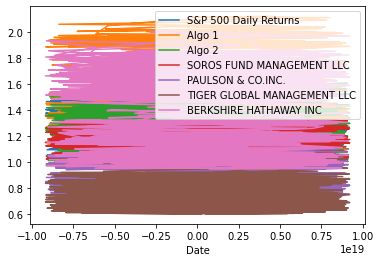

In [47]:
# Calculate cumulative returns of all portfolios
Combined_Dataframe['Date']=Combined_Dataframe["Date"].astype('int')
cumulative = (1+Combined_Dataframe).cumprod()

# Plot cumulative returns
cumulative.plot(x='Date')

<AxesSubplot:>

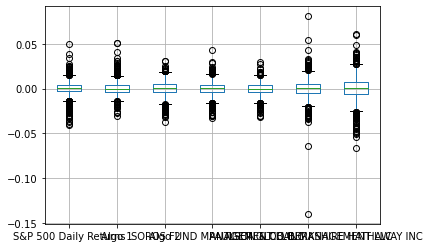

In [48]:
# Box plot to visually show risk
Combined_Dataframe = pd.merge(pd.merge(df2_sp500,df_algo,on='Date'),df_whale,on='Date')
Combined_Dataframe.boxplot()

In [49]:
# Calculate the daily standard deviations of all portfolios
Combined_Dataframe.rolling(window=7).std()  #rolling 7 day to calculate standard deviation

,S&P 500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1038,0.010773,0.002876,0.007413,0.006437,0.004970,0.008301,0.007600
1039,0.012076,0.003009,0.008589,0.007317,0.005514,0.009191,0.009004
1040,0.010325,0.003088,0.008612,0.006744,0.005543,0.008700,0.008765
1041,0.010262,0.003736,0.008566,0.006752,0.005351,0.008628,0.008640


In [50]:
# Calculate  the daily standard deviation of S&P 500
std_dev = Combined_Dataframe['S&P 500 Daily Returns'].rolling(window=7).std()

# Determine which portfolios are riskier than the S&P 500
Combined_Dataframe.std()
#Tiger Global and Berkshire both have a higher deviation therefore riskier than S&P 500

S&P 500 Daily Returns          0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [51]:
Combined_Dataframe['S&P 500 Daily Returns'].std(axis=0)

0.0085537315977582

In [52]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = Combined_Dataframe.rolling(window=252).std()
annualized_std_dev

,S&P 500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1038,0.010581,0.009666,0.010025,0.008893,0.006484,0.009562,0.015088
1039,0.010618,0.009669,0.010007,0.008899,0.006464,0.009568,0.015086
1040,0.010616,0.009665,0.009998,0.008899,0.006466,0.009569,0.015025
1041,0.010617,0.009680,0.009988,0.008900,0.006467,0.009570,0.015025


<AxesSubplot:>

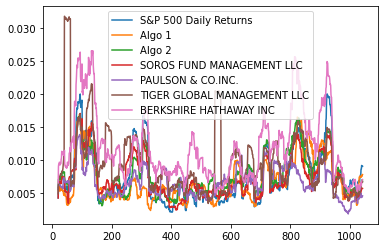

In [53]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Combined_Dataframe.rolling(window=21).std()

# Plot the rolling standard deviation
Combined_Dataframe.rolling(window=21).std().plot()

In [54]:
# Calculate the correlation 
Combined_Dataframe.corr(method ='pearson')

# Display de correlation matrix
Combined_Dataframe.corr()

,S&P 500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P 500 Daily Returns,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


1.8217749991632846e-05
7.316632424648705e-05
0.248990914594258


<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Algo 1 Returns vs. S&P 500 Returns'}>

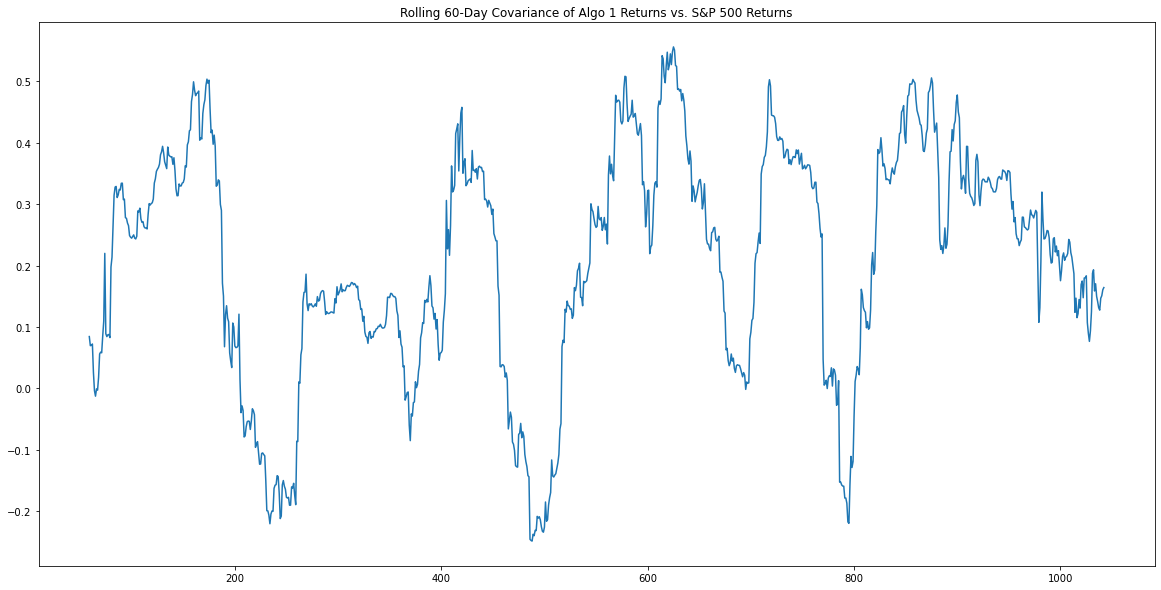

In [55]:
# Calculate covariance of a single portfolio 
covariance = Combined_Dataframe['S&P 500 Daily Returns'].cov(Combined_Dataframe['Algo 1'])
print (covariance)

# Calculate variance of S&P 500
variance = Combined_Dataframe['S&P 500 Daily Returns'].var()
print (variance)

# Computing beta
beta = covariance/variance
print(beta)

# Plot beta trend
rolling_covariance = Combined_Dataframe['Algo 1'].rolling(window=60).cov(Combined_Dataframe['S&P 500 Daily Returns'])
rolling_variance = Combined_Dataframe['S&P 500 Daily Returns'].rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Algo 1 Returns vs. S&P 500 Returns')

In [56]:
# Use `ewm` to calculate the rolling window
Combined_Dataframe.ewm(com=21).mean()

,S&P 500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,0.008841,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
1,0.004836,0.002773,0.003709,0.002177,-0.002050,0.001298,0.005928
2,0.003699,0.001600,0.001986,0.001923,-0.000908,0.001048,0.004528
3,0.002100,-0.001586,0.000054,0.000633,-0.002396,-0.000413,0.004178
4,0.001752,-0.002760,0.000678,0.001085,-0.001786,-0.000504,0.003446
...,...,...,...,...,...,...,...
1038,0.000287,0.000524,0.000464,0.000917,0.001041,0.000886,0.000547
1039,-0.000370,0.000275,-0.000078,0.000516,0.000831,0.000460,-0.000074
1040,-0.000299,0.000219,0.000122,0.000675,0.000979,0.000546,0.000236
1041,-0.000485,-0.000181,0.000227,0.000746,0.001081,0.000406,0.000416


In [57]:
# Annualized Sharpe Ratios
sharpe_ratios = ((Combined_Dataframe.mean()-Combined_Dataframe['S&P 500 Daily Returns'].mean()) * 252) / (Combined_Dataframe.std() * np.sqrt(252))
sharpe_ratios

<ipython-input-57-92fba23a1571>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sharpe_ratios = ((Combined_Dataframe.mean()-Combined_Dataframe['S&P 500 Daily Returns'].mean()) * 252) / (Combined_Dataframe.std() * np.sqrt(252))


S&P 500 Daily Returns          0.000000
Algo 1                         0.650964
Algo 2                        -0.163336
SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

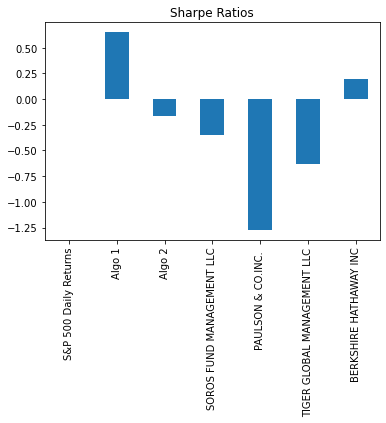

In [58]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar",title="Sharpe Ratios")

# Algo 1 outperformed S&P 500!

In [59]:
# Reading data from 3 stocks
tickers = ['GOOG','AAPL','COST']
start_date = '2020-01-01'
end_date = '2020-12-31'
data = data.get_data_yahoo(tickers,start_date,end_date)
data  #dataframe of all 3 stocks combined

Attributes    Adj Close                                Close              \
Symbols            GOOG        AAPL        COST         GOOG        AAPL   
Date                                                                       
2020-01-02  1367.369995   74.333511  281.102661  1367.369995   75.087502   
2020-01-03  1360.660034   73.610840  281.334106  1360.660034   74.357498   
2020-01-06  1394.209961   74.197395  281.411194  1394.209961   74.949997   
2020-01-07  1393.339966   73.848442  280.967651  1393.339966   74.597504   
2020-01-08  1404.319946   75.036385  284.188629  1404.319946   75.797501   
...                 ...         ...         ...          ...         ...   
2020-12-24  1738.849976  131.773087  363.861542  1738.849976  131.970001   
2020-12-28  1776.089966  136.486053  370.328766  1776.089966  136.690002   
2020-12-29  1758.719971  134.668762  371.985504  1758.719971  134.869995   
2020-12-30  1739.520020  133.520477  373.712097  1739.520020  133.720001   
2020-12-31  1751.880005  132.492020  376.037506  1751.880005  132.690002   

Attributes                     High                                  Low  \
Symbols           COST         GOOG        AAPL        COST         GOOG   
Date                                                                       
2020-01-02  291.489990  1368.140015   75.150002  294.579987  1341.550049   
2020-01-03  291.730011  1372.500000   75.144997  292.899994  1345.543945   
2020-01-06  291.809998  1396.500000   74.989998  292.070007  1350.000000   
2020-01-07  291.350006  1402.989990   75.224998  291.690002  1390.380005   
2020-01-08  294.690002  1411.579956   76.110001  295.480011  1390.839966   
...                ...          ...         ...         ...          ...   
2020-12-24  364.579987  1746.000000  133.460007  365.339996  1729.109985   
2020-12-28  371.059998  1790.728027  137.339996  371.690002  1746.334961   
2020-12-29  372.720001  1792.439941  138.789993  373.260010  1756.089966   
2020-12-30  374.450012  1765.094971  135.990005  375.859985  1725.599976   
2020-12-31  376.779999  1758.930054  134.740005  377.040009  1735.420044   

Attributes                                 Open                          \
Symbols           AAPL        COST         GOOG        AAPL        COST   
Date                                                                      
2020-01-02   73.797501  291.000000  1341.550049   74.059998  294.059998   
2020-01-03   74.125000  289.329987  1347.859985   74.287498  290.049988   
2020-01-06   73.187500  288.619995  1350.000000   73.447502  290.549988   
2020-01-07   74.370003  289.279999  1397.939941   74.959999  291.320007   
2020-01-08   74.290001  290.500000  1392.079956   74.290001  290.989990   
...                ...         ...          ...         ...         ...   
2020-12-24  131.100006  361.410004  1735.000000  131.320007  361.410004   
2020-12-28  133.509995  365.079987  1751.635010  133.990005  365.500000   
2020-12-29  134.339996  370.260010  1787.790039  138.050003  372.250000   
2020-12-30  133.399994  373.279999  1762.010010  135.580002  374.200012   
2020-12-31  131.720001  372.459991  1735.420044  134.080002  374.989990   

Attributes     Volume                          
Symbols          GOOG         AAPL       COST  
Date                                           
2020-01-02  1406600.0  135480400.0  2103600.0  
2020-01-03  1186400.0  146322800.0  1926000.0  
2020-01-06  1732300.0  118387200.0  2655100.0  
2020-01-07  1502700.0  108872000.0  1963400.0  
2020-01-08  1528000.0  132079200.0  2492800.0  
...               ...          ...        ...  
2020-12-24   346800.0   54930100.0   972500.0  
2020-12-28  1393000.0  124486200.0  3207700.0  
2020-12-29  1299400.0  121047300.0  2072600.0  
2020-12-30  1306100.0   96452100.0  1778000.0  
2020-12-31  1011900.0   99116600.0  1628900.0  

[253 rows x 18 columns]

In [62]:
# Reset Date index
data.reset_index()

Attributes       Date    Adj Close                                Close  \
Symbols                       GOOG        AAPL        COST         GOOG   
0          2020-01-02  1367.369995   74.333511  281.102661  1367.369995   
1          2020-01-03  1360.660034   73.610840  281.334106  1360.660034   
2          2020-01-06  1394.209961   74.197395  281.411194  1394.209961   
3          2020-01-07  1393.339966   73.848442  280.967651  1393.339966   
4          2020-01-08  1404.319946   75.036385  284.188629  1404.319946   
..                ...          ...         ...         ...          ...   
248        2020-12-24  1738.849976  131.773087  363.861542  1738.849976   
249        2020-12-28  1776.089966  136.486053  370.328766  1776.089966   
250        2020-12-29  1758.719971  134.668762  371.985504  1758.719971   
251        2020-12-30  1739.520020  133.520477  373.712097  1739.520020   
252        2020-12-31  1751.880005  132.492020  376.037506  1751.880005   

Attributes                                 High                          \
Symbols           AAPL        COST         GOOG        AAPL        COST   
0            75.087502  291.489990  1368.140015   75.150002  294.579987   
1            74.357498  291.730011  1372.500000   75.144997  292.899994   
2            74.949997  291.809998  1396.500000   74.989998  292.070007   
3            74.597504  291.350006  1402.989990   75.224998  291.690002   
4            75.797501  294.690002  1411.579956   76.110001  295.480011   
..                 ...         ...          ...         ...         ...   
248         131.970001  364.579987  1746.000000  133.460007  365.339996   
249         136.690002  371.059998  1790.728027  137.339996  371.690002   
250         134.869995  372.720001  1792.439941  138.789993  373.260010   
251         133.720001  374.450012  1765.094971  135.990005  375.859985   
252         132.690002  376.779999  1758.930054  134.740005  377.040009   

Attributes          Low                                 Open              \
Symbols            GOOG        AAPL        COST         GOOG        AAPL   
0           1341.550049   73.797501  291.000000  1341.550049   74.059998   
1           1345.543945   74.125000  289.329987  1347.859985   74.287498   
2           1350.000000   73.187500  288.619995  1350.000000   73.447502   
3           1390.380005   74.370003  289.279999  1397.939941   74.959999   
4           1390.839966   74.290001  290.500000  1392.079956   74.290001   
..                  ...         ...         ...          ...         ...   
248         1729.109985  131.100006  361.410004  1735.000000  131.320007   
249         1746.334961  133.509995  365.079987  1751.635010  133.990005   
250         1756.089966  134.339996  370.260010  1787.790039  138.050003   
251         1725.599976  133.399994  373.279999  1762.010010  135.580002   
252         1735.420044  131.720001  372.459991  1735.420044  134.080002   

Attributes                 Volume                          
Symbols           COST       GOOG         AAPL       COST  
0           294.059998  1406600.0  135480400.0  2103600.0  
1           290.049988  1186400.0  146322800.0  1926000.0  
2           290.549988  1732300.0  118387200.0  2655100.0  
3           291.320007  1502700.0  108872000.0  1963400.0  
4           290.989990  1528000.0  132079200.0  2492800.0  
..                 ...        ...          ...        ...  
248         361.410004   346800.0   54930100.0   972500.0  
249         365.500000  1393000.0  124486200.0  3207700.0  
250         372.250000  1299400.0  121047300.0  2072600.0  
251         374.200012  1306100.0   96452100.0  1778000.0  
252         374.989990  1011900.0   99116600.0  1628900.0  

[253 rows x 19 columns]

In [72]:
# Calculate daily returns
all_returns = data.pct_change()
print(all_returns)

# Drop NAs
data.isnull()
data.dropna(inplace=True)

# Display sample data
data.head()

Attributes   Adj Close                              Close             \
Symbols           GOOG       AAPL        COST        GOOG       AAPL   
Date                                                                   
2020-01-13         NaN        NaN         NaN         NaN        NaN   
2020-01-14 -510.553074   2.717425  -10.466205 -510.553074   2.717244   
2020-01-15   -1.001751  -0.783115   -1.751266   -1.001751  -0.783101   
2020-01-16  -19.668791 -48.346532   -0.816469  -19.668791 -48.346147   
2020-01-17   -1.051705  -1.017394    0.029139   -1.051705  -1.017394   
...                ...        ...         ...         ...        ...   
2020-12-24    4.995124  11.125440   46.836045    4.995124  11.125517   
2020-12-28   -0.003403  -0.914269   -0.975756   -0.003403  -0.914270   
2020-12-29   -1.363412  -1.070488    0.617852   -1.363412  -1.070495   
2020-12-30   -0.163711  -4.870023   -0.602353   -0.163711  -4.869553   
2020-12-31  530.581552  54.166987  114.121410  530.581552  54.18

Attributes   Adj Close                            Close                       \
Symbols           GOOG       AAPL      COST        GOOG       AAPL      COST   
Date                                                                           
2020-01-13   -1.098899  -1.467485 -0.869607   -1.098899  -1.467478 -0.869353   
2020-01-14  559.947567  -5.455265  8.231881  559.947567  -5.454975  8.208914   
2020-01-15   -0.980362  -1.183165 -6.184329   -0.980362  -1.183178 -6.187548   
2020-01-16   18.302167  56.018776 -1.135014   18.302167  56.018924 -1.134922   
2020-01-17   -0.946311  -0.974373 -1.168087   -0.946311  -0.974373 -1.168095   

Attributes       High                                Low             \
Symbols          GOOG       AAPL       COST         GOOG       AAPL   
Date                                                                  
2020-01-13 -16.878278  -1.727828  -1.242519    -0.862818  -1.576727   
2020-01-14  -1.635355  -2.555519 -65.550517  1058.461318  -3.056571   
2020-01-15  -0.885840  -8.596652  -1.039603    -0.992873  14.544023   
2020-01-16 -44.132046  -0.884052  -0.122704   -34.187383  -0.952220   
2020-01-17  -1.019731 -22.129601  -5.207920    -1.028941  -4.232319   

Attributes                    Open                               Volume  \
Symbols             COST      GOOG         AAPL        COST        GOOG   
Date                                                                      
2020-01-13     -0.503088 -1.709393    -0.303624    4.298775   -0.753869   
2020-01-14 -10601.430327 -5.106836  1590.661263   -0.711812    0.019418   
2020-01-15     -1.000134 -0.533386    -0.999066   -0.841201 -172.238019   
2020-01-16      4.060223 -0.538232     0.037617  189.916411   -1.018795   
2020-01-17     -0.766783 -8.429732   129.167527   -0.972769   22.889873   

Attributes                        
Symbols          AAPL       COST  
Date                              
2020-01-13  -1.171130  -0.638166  
2020-01-14  24.066670  -2.992268  
2020-01-15  -0.942422  -1.748732  
2020-01-16  -1.416733  41.045360  
2020-01-17  38.278714  -3.964732

In [79]:
# Set weights
weights = 1/3

# Calculate portfolio return
portfolio_returns = all_returns["GOOG"] * weights + all_returns["AAPL"] * weights + all_returns["COST"] * weights 

# Display sample data
portfolio_returns.head()

KeyError: 'AAPL'

In [81]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat(tickers,axis="rows",join="inner")

# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [82]:
# Calculate the annualized `std`
annualized_std = portfolio_returns.rolling(window=252).std()
annualized_std

NameError: name 'portfolio_returns' is not defined

In [83]:
# Calculate rolling standard deviation
rolling_std = portfolio_returns.rolling(window=21).std()
rolling_std

# Plot rolling standard deviation
rolling_std.plot()

NameError: name 'portfolio_returns' is not defined

In [84]:
# Calculate Annualzied Sharpe Ratios
sharpe_annualized = ((portfolio_returns.mean()-portfolio_returns['S&P 500 Daily Returns'].mean()) * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_annualized 

# Visualize the sharpe ratios as a bar plot
sharpe_annualized.plot(kind="bar",title="Sharpe Ratios")

NameError: name 'portfolio_returns' is not defined